Global Food Wastage Economic Loss Analysis

It is curious to explore a dataset that not only quantifies global food wastage but also attempts to translate that waste into economic loss figures. In a world where food insecurity and economic challenges coexist, understanding the roots of wastage may open doors to sensible and data-driven solutions.

In [1]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# import necessary libraries
import pandas as pd
import numpy as np

# use matplotlib with Agg backend
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # For environments where only plt is imported

%matplotlib inline

import seaborn as sns

# for prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

# Set style for seaborn
sns.set(style='whitegrid')

In [3]:
# Load the global food wastage dataset
df = pd.read_csv('data/global_food_wastage_dataset.csv')

# Display basic information about the dataset
print('Dataset Loaded Successfully.')
print(f'Shape of the dataset: {df.shape}')

Dataset Loaded Successfully.
Shape of the dataset: (5000, 8)


Data Loading and Initial Exploration

Let's have an initial look at the dataset. We will check out the head of the dataframe, its information summary and descriptive statistics. This gives us a context for further cleaning and analysis.

In [4]:
# Display the first few rows of the dataset
print(df.head())

# Display information about the dataframe
print(df.info())

# Display basic statistics of numeric columns
print(df.describe())

     Country  Year        Food Category  Total Waste (Tons)  \
0  Australia  2019  Fruits & Vegetables            19268.63   
1  Indonesia  2019        Prepared Food             3916.97   
2    Germany  2022       Dairy Products             9700.16   
3     France  2023  Fruits & Vegetables            46299.69   
4     France  2023            Beverages            33096.57   

   Economic Loss (Million $)  Avg Waste per Capita (Kg)  Population (Million)  \
0                   18686.68                      72.69                 87.59   
1                    4394.48                     192.52               1153.99   
2                    8909.16                     166.94               1006.11   
3                   40551.22                     120.19                953.05   
4                   36980.82                     104.74               1105.47   

   Household Waste (%)  
0                53.64  
1                30.61  
2                48.08  
3                31.91  
4        

Data Cleaning and Preprocessing

In this section, we verify the data types and explore missing values. Since the column 'Year' is provided as an integer, we infer that it represents a yearly timestamp. We also make sure categorical columns are of string type for consistent analysis.

Note: Some errors with data type conversions or missing values can occur in datasets like these. We use methods such as .fillna() and pd.to_numeric() to address and resolve these common issues.

In [5]:
# Check for missing values
print('Missing values in each column:')
print(df.isnull().sum())

# Convert 'Year' to string if needed for categorical analysis (or leave as int for ordering)
df['Year'] = df['Year'].astype(int)

# Ensure categorical columns are of type string
categorical_columns = ['Country', 'Food Category']
for col in categorical_columns:
    df[col] = df[col].astype(str)

# If missing values are present, one might consider filling, dropping, or imputing them
# Example: df.fillna(method='ffill', inplace=True)
print('Data cleaning completed.')

Missing values in each column:
Country                      0
Year                         0
Food Category                0
Total Waste (Tons)           0
Economic Loss (Million $)    0
Avg Waste per Capita (Kg)    0
Population (Million)         0
Household Waste (%)          0
dtype: int64
Data cleaning completed.


Exploratory Data Analysis (EDA)

Here we explore the dataset with various visualizations. We will create a correlation heatmap, pair plot, histograms of numeric features, a count plot for food categories, and a box plot comparing economic loss across food categories.

Note: For correlation analysis, we focus strictly on numeric columns to avoid type errors.

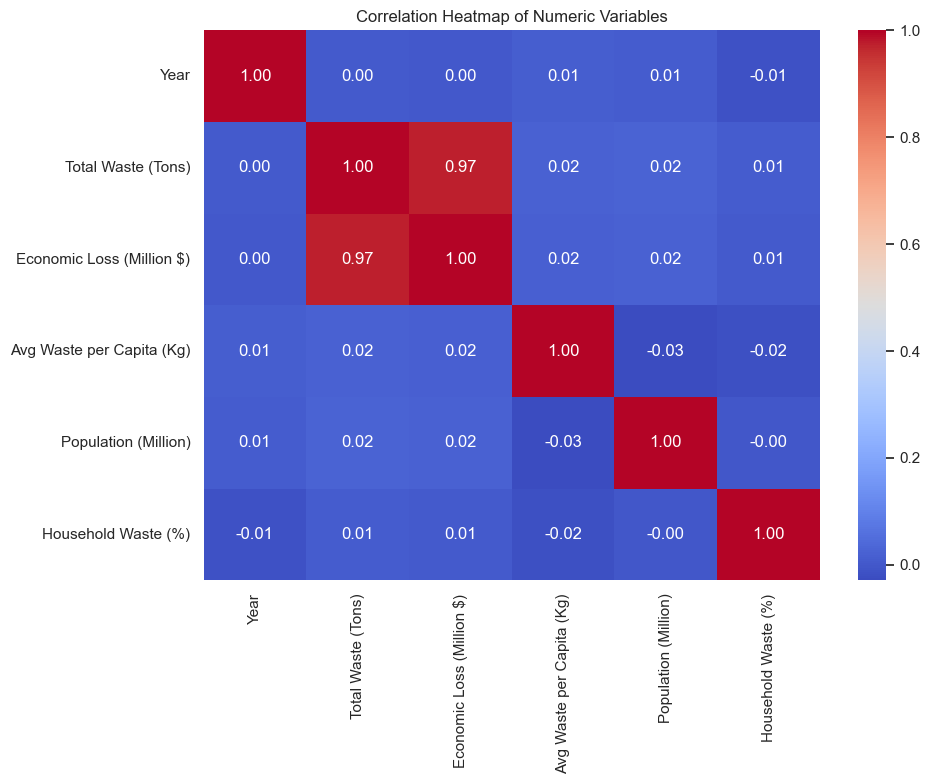

In [6]:
# Extract only numeric values for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Check if there are four or more numeric columns before plotting the heatmap
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10,8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Variables')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for correlation heatmap.')

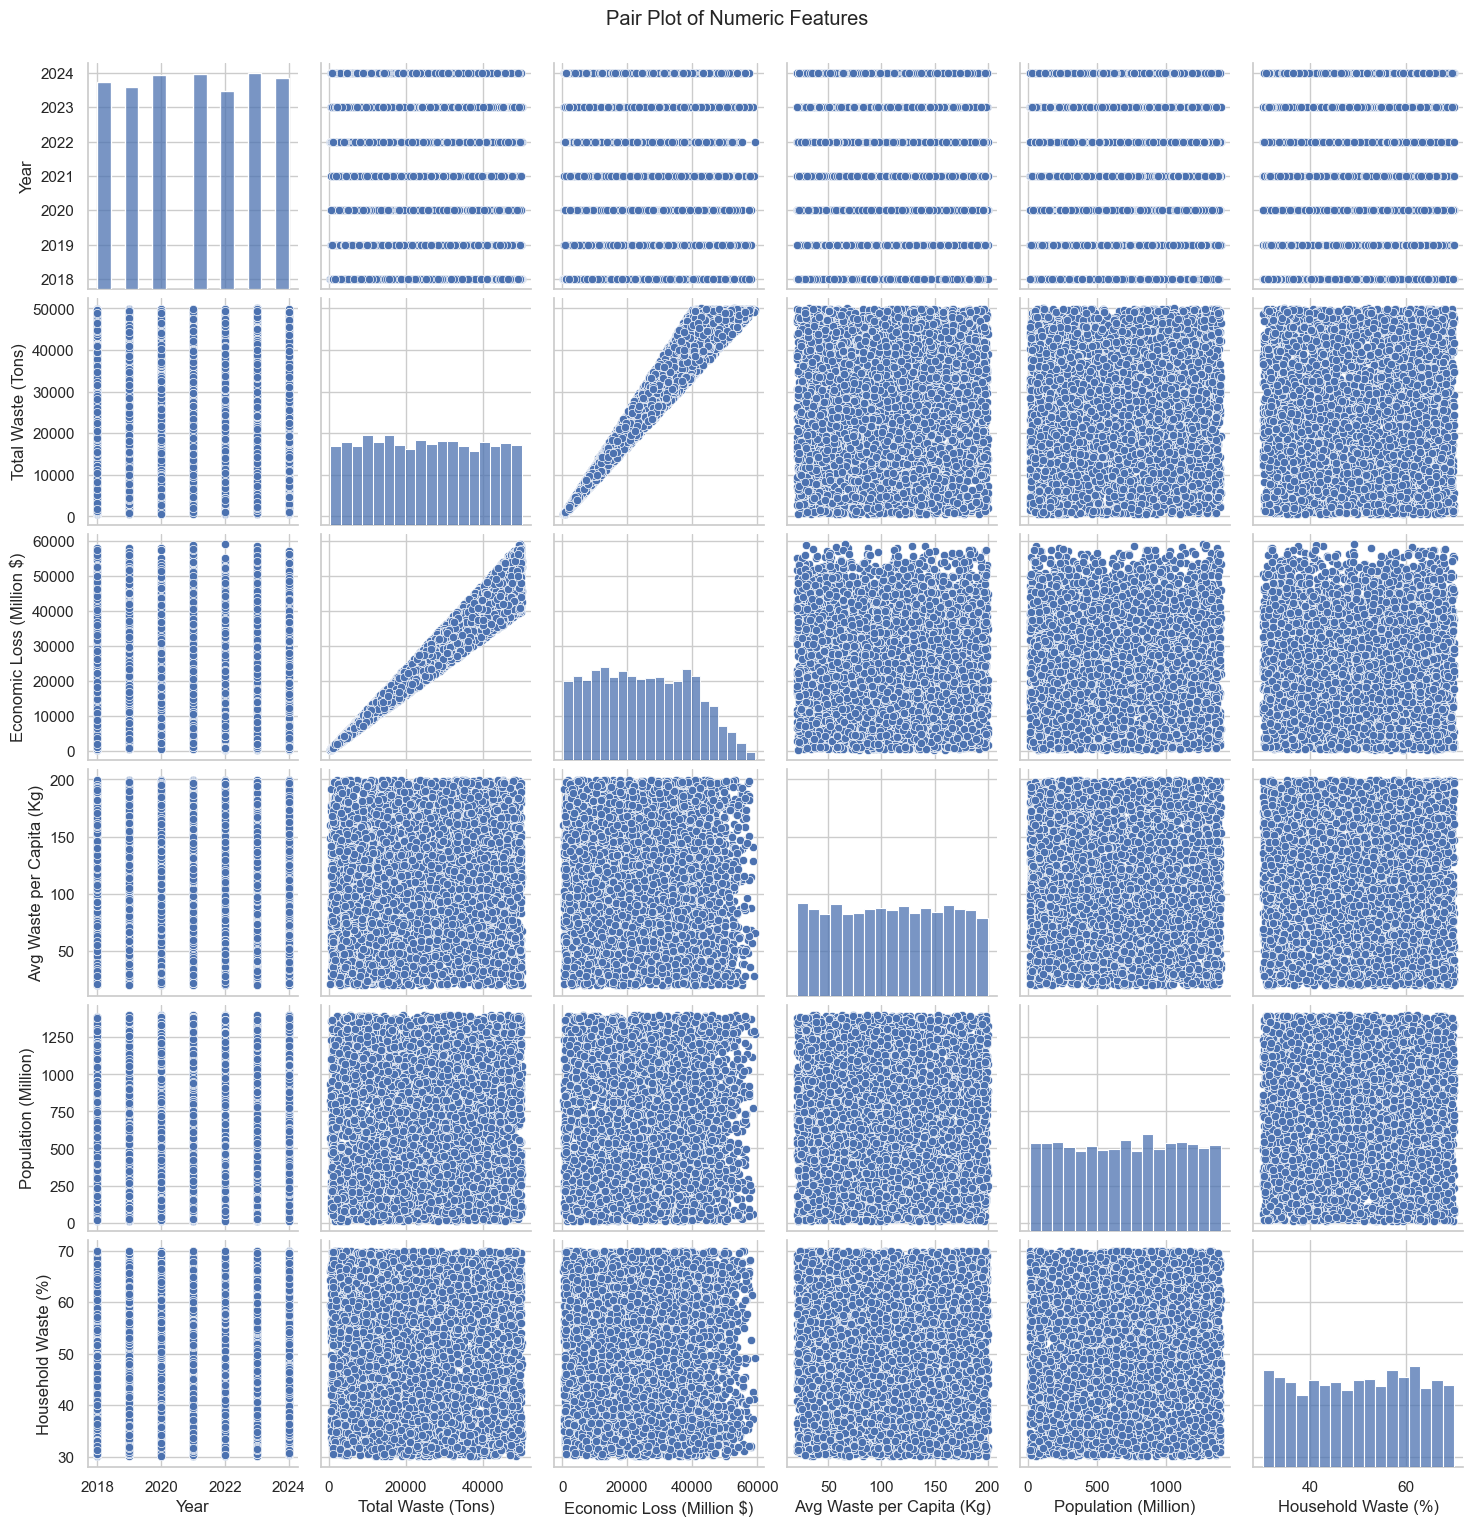

In [7]:
# Create a pair plot to visualize pairwise relationships among numeric features
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

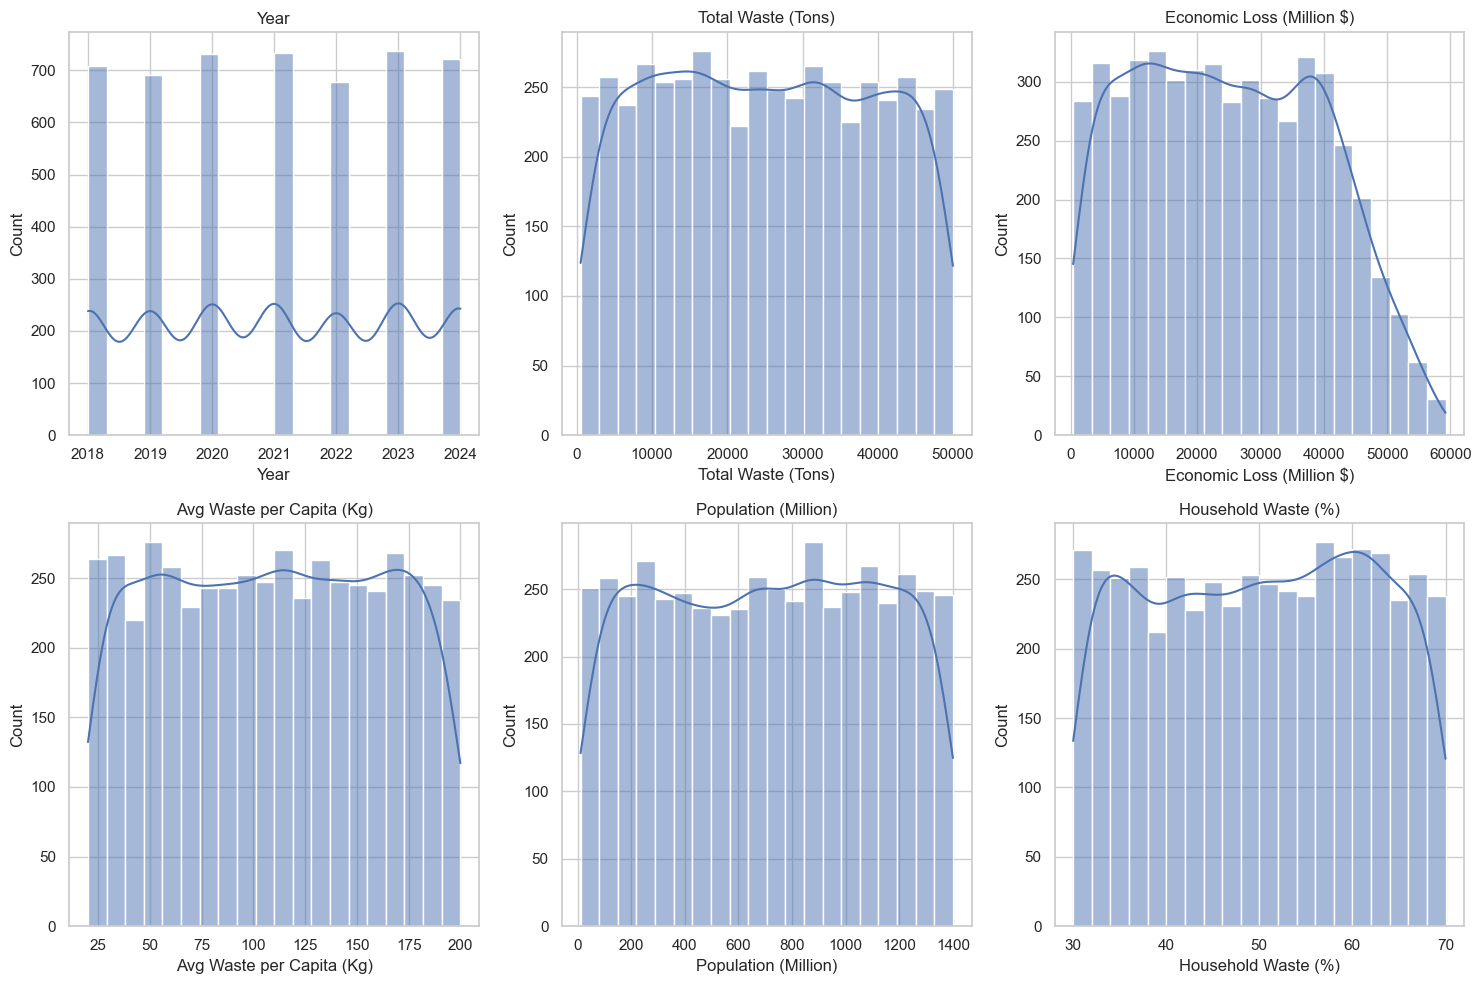

In [8]:
# Plot histograms for each numeric column
numeric_columns = numeric_df.columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, (len(numeric_columns)+1)//2, i+1)
    sns.histplot(numeric_df[col], kde=True, bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()


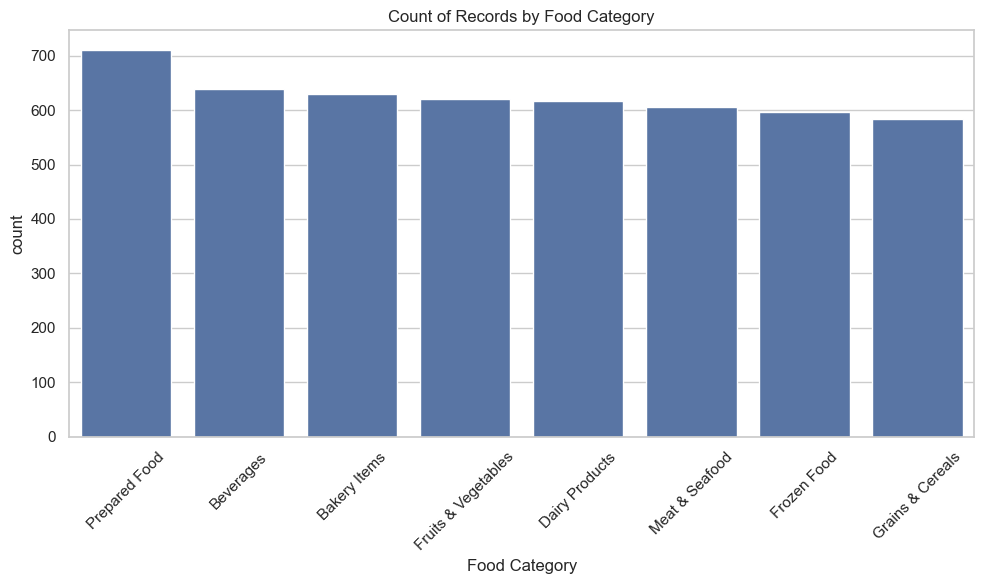

In [9]:
# Create a count plot for the Food Category column
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Food Category', order=df['Food Category'].value_counts().index)
plt.title('Count of Records by Food Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


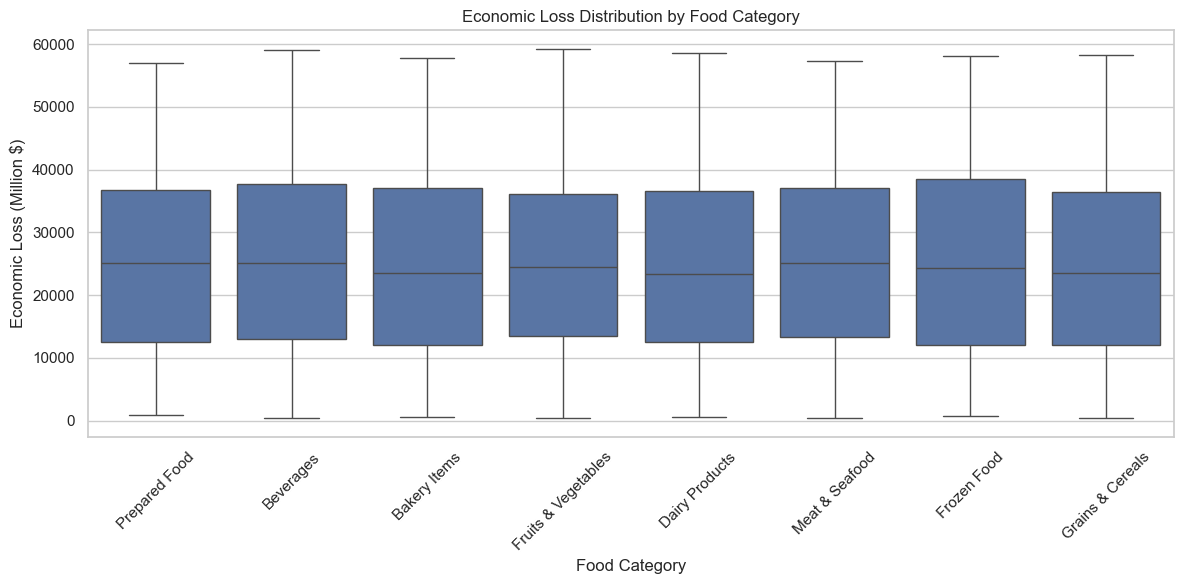

In [10]:
# Box plot comparing Economic Loss across different Food Categories
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Food Category', y='Economic Loss (Million $)', order=df['Food Category'].value_counts().index)
plt.title('Economic Loss Distribution by Food Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Prediction Analysis

Now we develop a prediction model to estimate the economic loss (in Million $) due to food wastage. The idea is to leverage numeric features such as 'Total Waste (Tons)', 'Avg Waste per Capita (Kg)', 'Population (Million)', and 'Household Waste (%)'.

We will implement a simple linear regression model and evaluate it using the R² score. Additionally, we compute permutation importance to better understand feature contributions.

Note: While linear regression is a baseline model, further improvements could involve more sophisticated algorithms and hyperparameter tuning.

In [11]:
# Define the target variable and feature columns
target = 'Economic Loss (Million $)'
feature_columns = ['Total Waste (Tons)', 'Avg Waste per Capita (Kg)', 'Population (Million)', 'Household Waste (%)']

# Ensure the feature columns do not have missing values
X = df[feature_columns].copy()
y = df[target].copy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f'Linear Regression R^2 Score: {r2:.2f}')


Linear Regression R^2 Score: 0.95


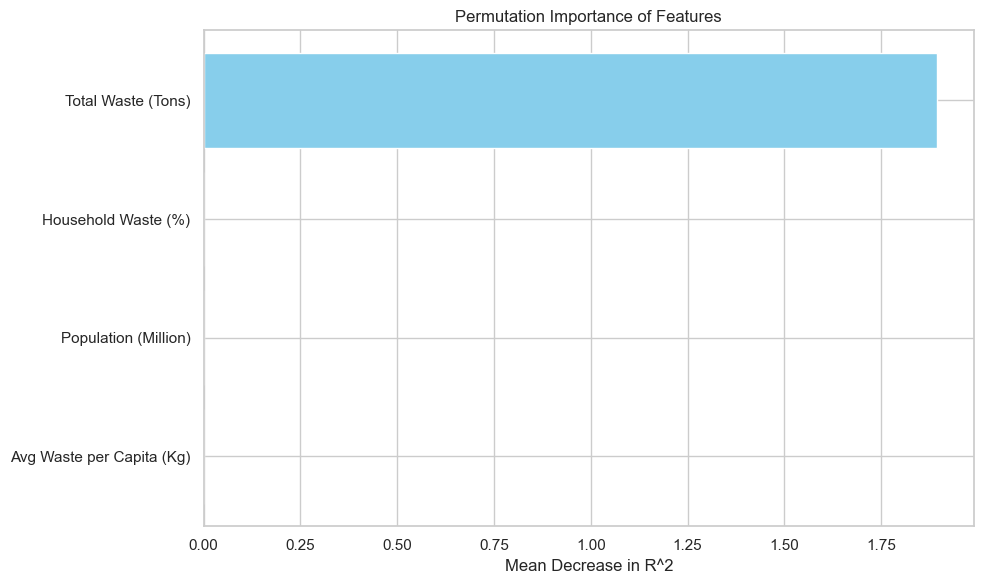

In [12]:
# Compute permutation importance for the trained model
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': perm_importance.importances_mean})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot horizontal bar chart for permutation importance
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Mean Decrease in R^2')
plt.title('Permutation Importance of Features')
plt.tight_layout()
plt.show()

Conclusion and Future Work

This analysis shows that data relating to global food wastage contains intriguing patterns linking waste quantities and economic losses across countries and food categories. The exploratory visualizations uncovered relationships among numeric features, and the prediction model provided a baseline for estimating economic impact.

Future improvements could include:

Incorporating additional features such as country-specific socio-economic indicators
Exploring non-linear and ensemble models for better predictive performance
Detailed time-series analysis for trends across the years
Thank you for exploring this notebook. 